# Müşteri Kişilik Analizi

- Yazar: Bora Dere
- Son güncelleme: 20/02/2024
- İletişim: boradere@hotmail.com.tr

## 1- Verinin Ön İşlemesi

### 1.1- Importlar ve Veri Setinin Yüklenmesi

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np

sns.set_theme(style='darkgrid', palette='viridis')
warnings.filterwarnings('ignore')

data = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df = pd.DataFrame(data)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 1.2- Verinin İncelenmesi ve İşlenmesi

Özellikleri incelersek 4 ayrı kategoriye dağıldıklarını görüyoruz. Bunlar:

**Müşteriler:**
* **ID:** Müşterinin benzersiz tanımlayıcısı
* **Year_Birth:** Müşterinin doğum yılı
* **Education:** Müşterinin eğitim düzeyi
* **Marital_Status:** Müşterinin medeni durumu
* **Income:** Müşterinin yıllık hane geliri
* **Kidhome:** Müşterinin hane halkındaki çocuk sayısı
* **Teenhome:** Müşterinin hane halkındaki genç sayısı
* **Dt_Customer:** Müşterinin şirkete kayıt tarih
* **Recency:** Müşterinin son satın almadan bu yana geçen gün sayısı
* **Complain:** Müşterinin son 2 yılda şikayette bulunup bulunmadığı (1: Evet, 0: Hayır)

**Ürünler:**

* **MntWines:** Son 2 yılda şaraba harcanan miktar
* **MntFruits:** Son 2 yılda meyveye harcanan miktar
* **MntMeatProducts:** Son 2 yılda ete harcanan miktar
* **MntFishProducts:** Son 2 yılda balığa harcanan miktar
* **MntSweetProducts:** Son 2 yılda tatlılara harcanan miktar
* **MntGoldProds:** Son 2 yılda altına harcanan miktar

**Promosyon:**

* **NumDealsPurchases:** İndirimli alışveriş yapılan toplam satın alma sayısı
* **AcceptedCmp1:** Müşterinin 1. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **AcceptedCmp2:** Müşterinin 2. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **AcceptedCmp3:** Müşterinin 3. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **AcceptedCmp4:** Müşterinin 4. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **AcceptedCmp5:** Müşterinin 5. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **Response:** Müşterinin son kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)

**Yer:**

* **NumWebPurchases:** Şirketin web sitesi üzerinden yapılan satın alma sayısı
* **NumCatalogPurchases:** Katalog kullanılarak yapılan satın alma sayısı
* **NumStorePurchases:** Mağazalardan doğrudan yapılan satın alma sayısı
* **NumWebVisitsMonth:** Son ay içinde şirket web sitesine yapılan ziyaret sayısı

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID ve Dt_Customer işimize yaramayan özellikler olduğu için bunları atıyoruz.

In [56]:
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


Herhangi bir boş değer var mı kontrol ediyoruz.

In [57]:
(df.isnull().sum()/len(df))*100

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Income özelliğinin 1% civarı NaN değerlerden oluşuyor. Bu oran çok da yüksek olmadığı için herhangi bir detaylı imputation yöntemiyle uğraşmaktansa boş verileri droplayıp geçiyoruz.

In [58]:
df = df.dropna()
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Kopya girdi olup olmadığına bakıyoruz.

In [59]:
df.duplicated().sum()

182

182 adet kopya girdi varmış. Bunları atıyoruz, zira aynı veriden birden fazla olmasına ihtiyacımız yok.

In [60]:
df.drop_duplicates(inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,Graduation,Together,666666.0,1,0,23,9,14,18,...,6,0,0,0,0,0,0,3,11,0
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


Elimizde 27 adet özellik var. 3x9'luk bir gridde hepsinin dağılımını inceliyoruz.

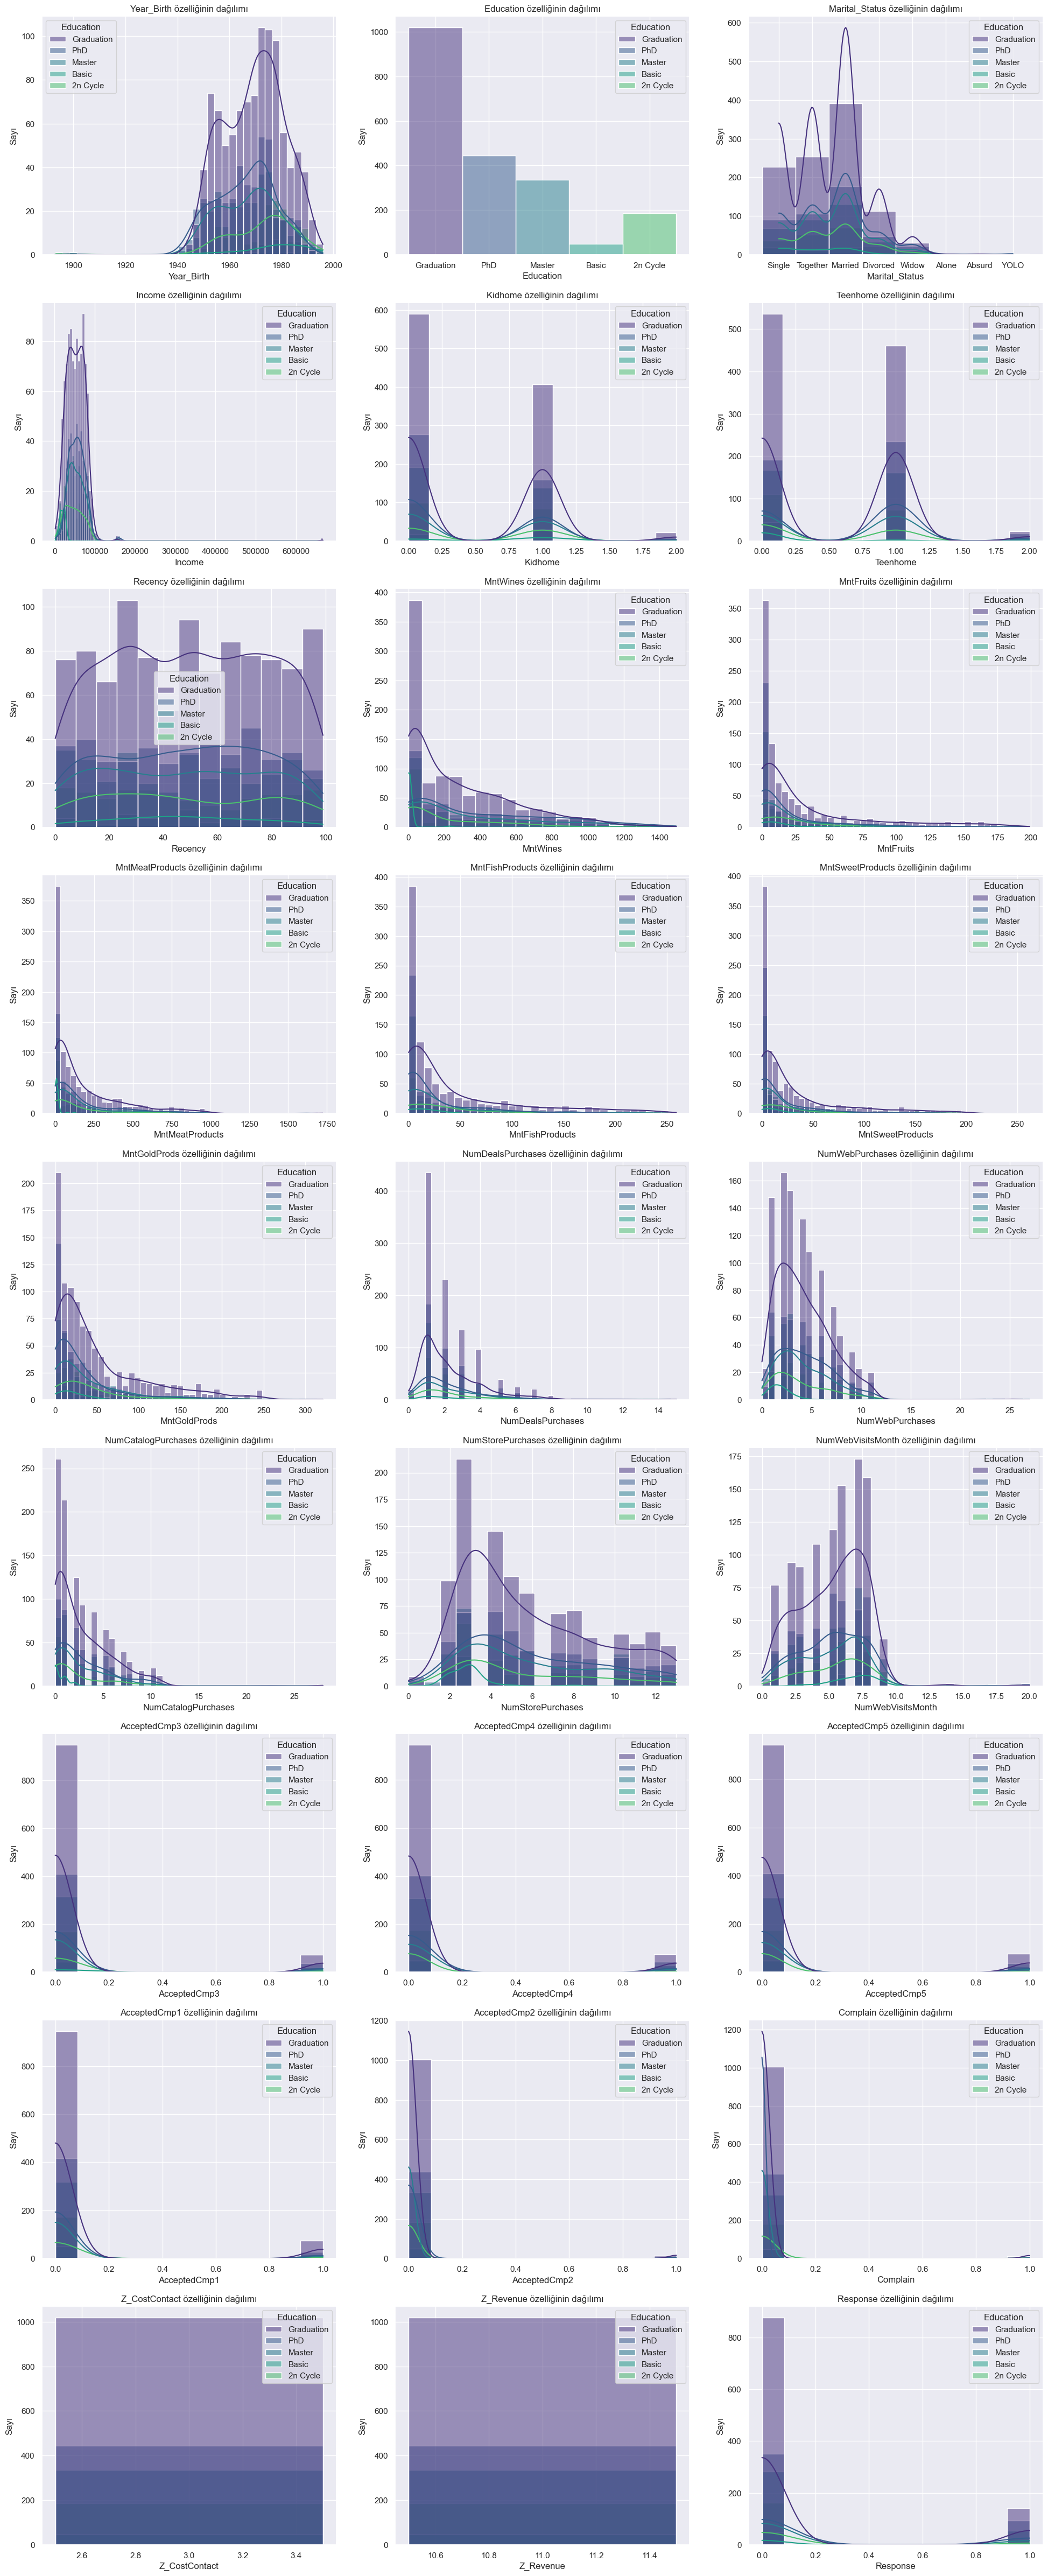

In [61]:
plt.figure(figsize=(24, 45 + 2*8))

for i, col in enumerate(df.columns):
    plt.subplot(9, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, hue='Education')
    plt.ylabel('Sayı')
    plt.title(f"{col} özelliğinin dağılımı")

Bir de boxplot kullanarak bakalım.

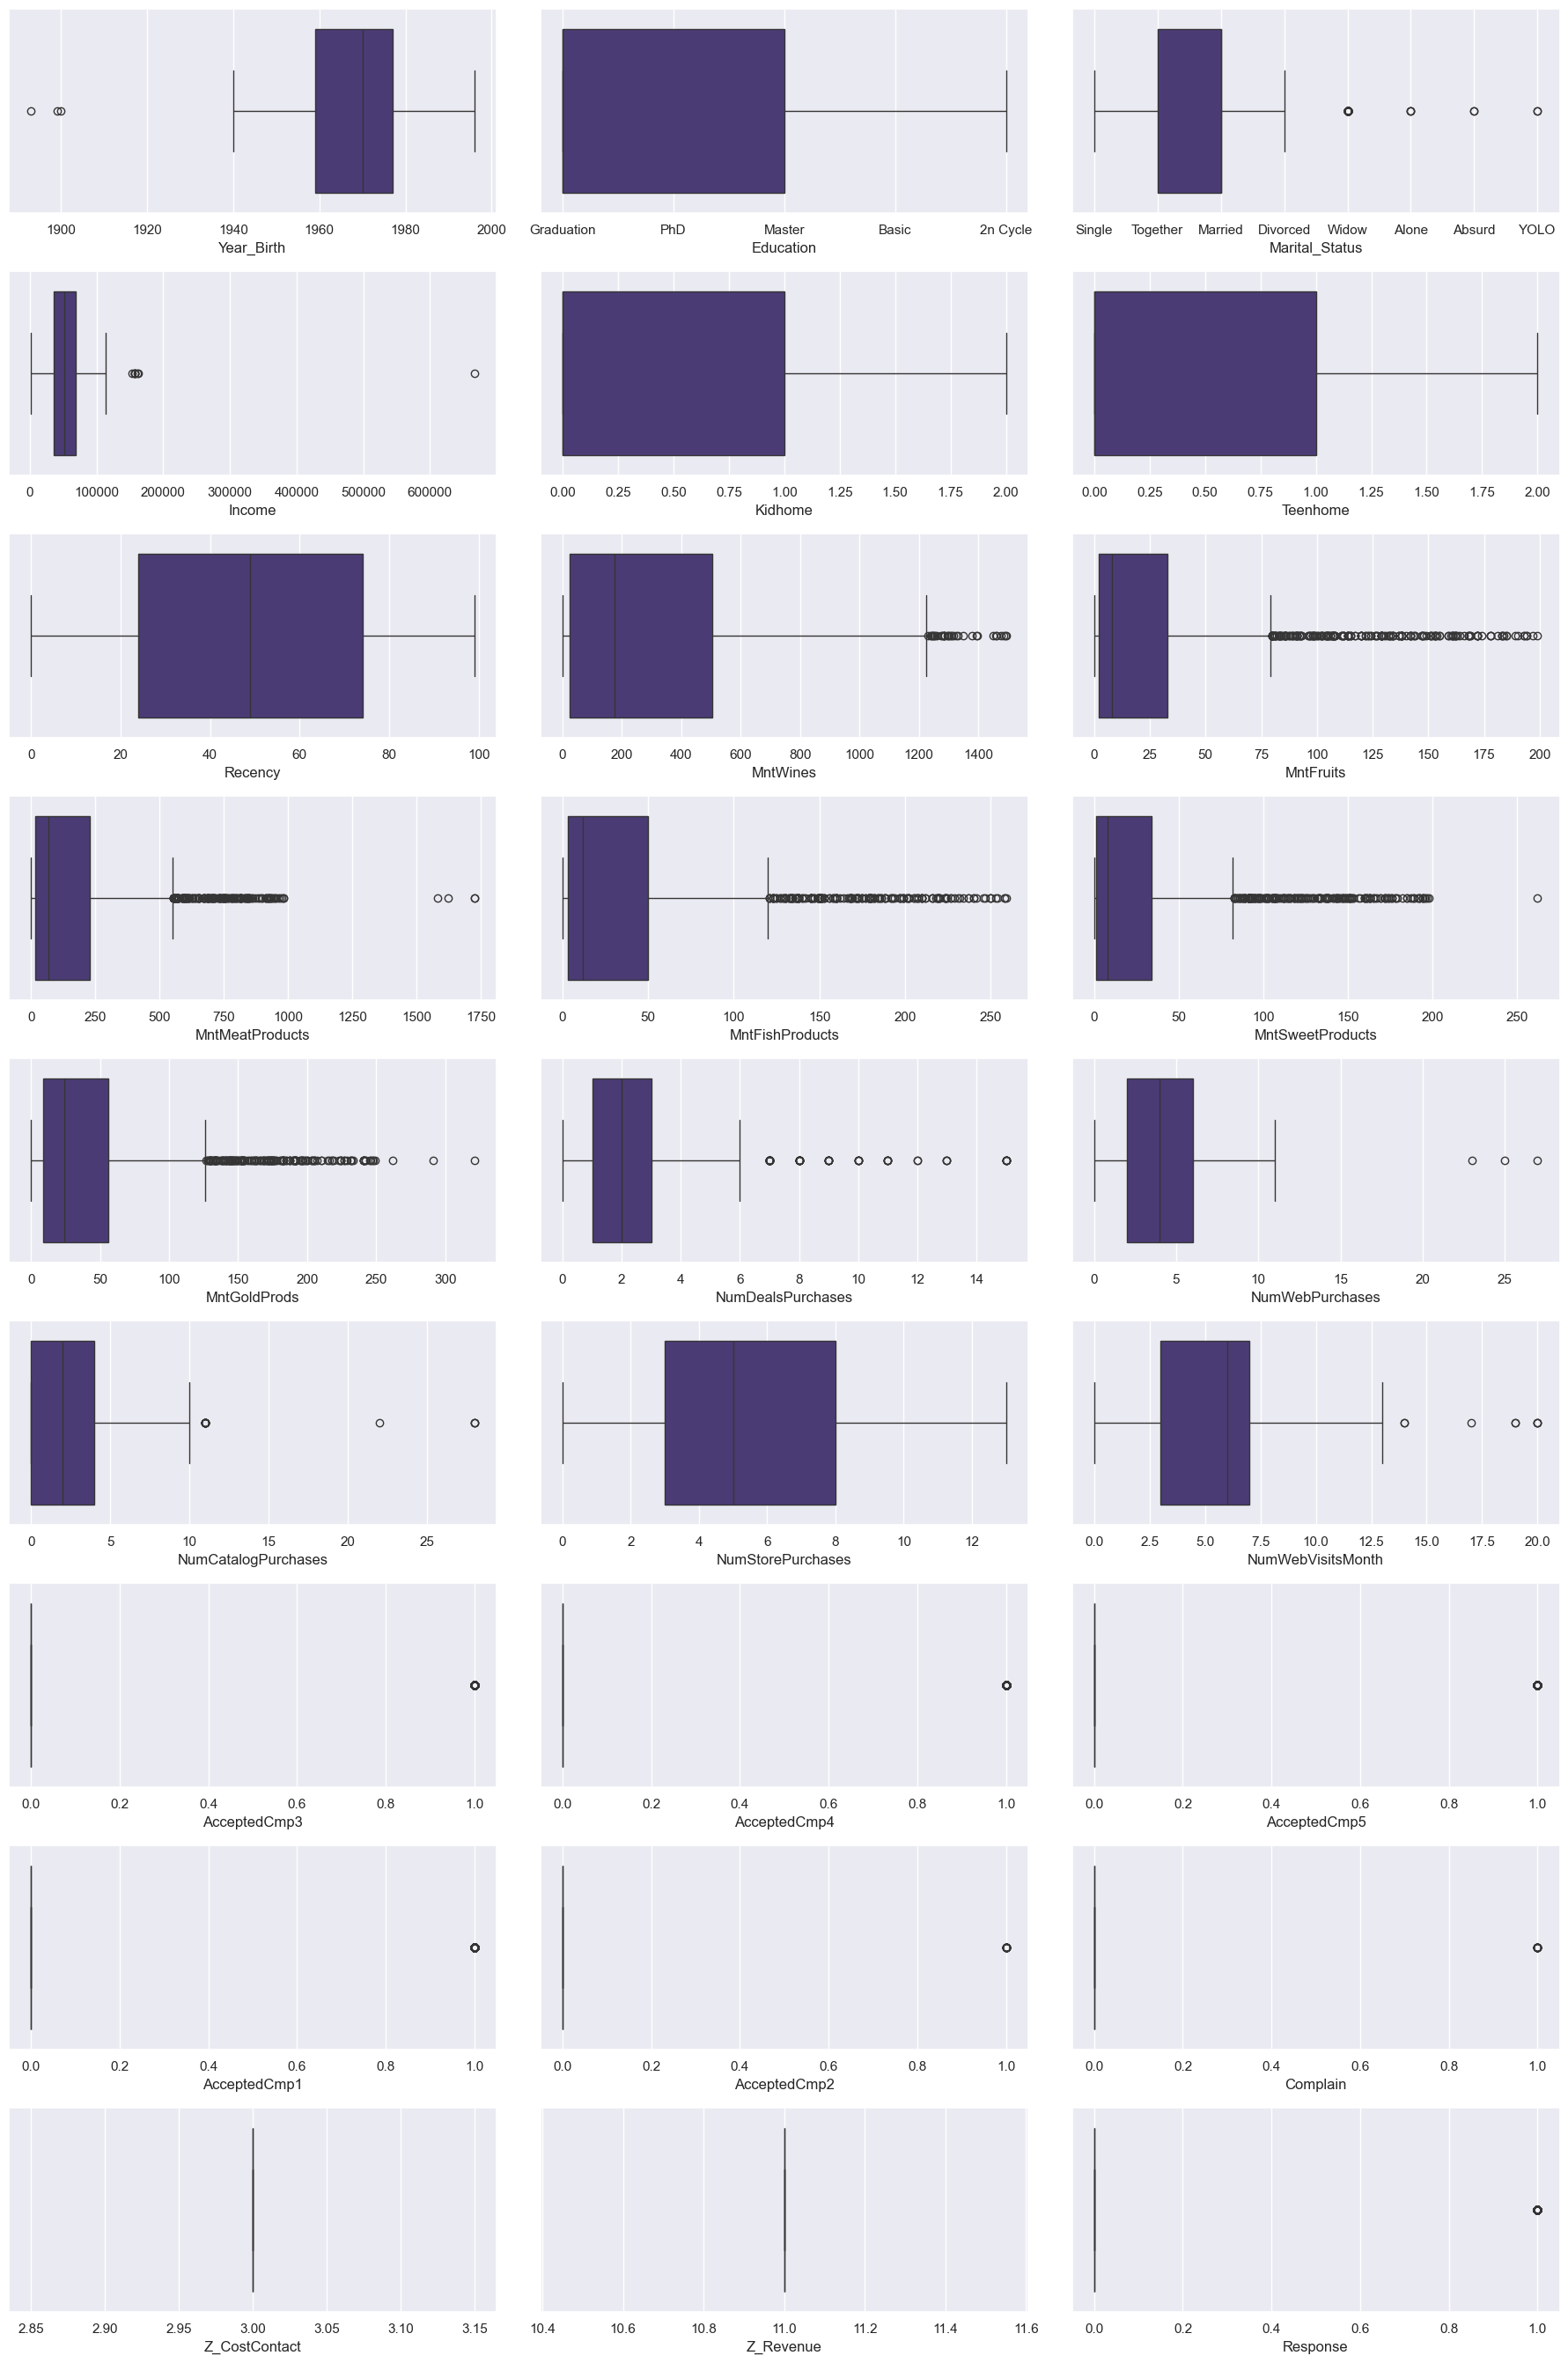

In [71]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(df.columns):
    plt.subplot(9, 3, i+1)
    sns.boxplot(data=df, x=col)

plt.tight_layout()

Belirli özelliklerde hatırı sayılır miktarda outlier var gibi gözüküyor ancak outlierları atmak kümeleri bozabilir. Outlierları atmak yerine belki bir miktar faydası dokunur diye -- label encoding, minmax scaling?